# ISO Annotation

В DialogBank хранятся части 5 датасетов с диалогами, размеченных по стандарту ISO: DBOX, Switchboard, MapTask, TRAINS, Hujiang. К сожалению, данных с готовой разметкой довольно мало - для каждого датасета всего 3-5 размеченных диалогов. Тем не менее, часть датасетов можно скачать с другой разметкой или без разметки, а затем разметить самостоятельно 

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

## DBOX

www.idiap.ch/project/d-box/

Диалоги человека и компьютера в формате игры. Игрок может задавать любые вопросы, чтобы угадать имя загаданного известного человека. В DialogBank содержится 5 диалогов DBOX, размеченных по ISO. Остальной датасет тоже размечен по ISO, но в открытом доступе его нет

In [2]:
dbox = pd.read_excel('dbox.xlsx')
dbox.head(5)

,id,Markables,Da-ID,Dialogue acts,Sender,Addressee,other Ps,FS text,Turn transcription,Comments
0,1,fsp1DISCV0; fsp1SOMCV0; fsp1CTMCV0,dap1DIS0; dap1SOM0; dap1CTM0,DS:opening; SOM:initGreeting; contactManagemen...,p1,p2,NaN,good afternoon,good afternoon,NaN
1,1,fsp2DISCV0; fsp2SOMCV0; fsp2CTMCV0,dap2DIS0; dap2SOM0; dap2CTM0,DS:opening (Fe:fsp2DISFB0); SOM:returnGreeting...,p2,p1,NaN,hello,hello,NaN
2,1,fsp1TUMCV0; fsp1TIMCV0,dap1TUM0; dap1TIM0,TuM:turnTake; TiM:stalling,p1,p2,NaN,uh,uh what's your name,NaN
3,1,fsp1SOMCV1,dap1SOM1,SOM:setQuestion,p1,p2,NaN,whats your name,NaN,NaN
4,1,fsp2SOMCV1,dap2SOM1,SOM:setAnswer (Fu:dap1SOM1),p2,p1,NaN,my name is gregor linn,my name is gregor linn,NaN


In [3]:
# отдельно загружаю теги (столбец Dialogue acts), но немного предобработанные 
dbox_tags = pd.read_excel('dbox_tags.xlsx')
dbox_tags.head(5)

,tag,count
0,TiM:stalling,99
1,TuM:turnKeep,73
2,AutoF:autoPositive,72
3,TuM:turnTake,32
4,Ta:setQuestion,27


**Какие данные есть в датасете:**

In [4]:
def about_df(df):
    print('Информация о датасете:')
    print('')
    dbox.info()
    print('')
    print('Количество диалогов, размеченных по стандарту ISO: ', df['id'].max())
    print('')
    print('Средняя длина диалога: ', df.groupby('id')['FS text'].count().mean())

In [5]:
about_df(dbox)

Информация о датасете:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  450 non-null    int64  
 1   Markables           450 non-null    object 
 2   Da-ID               450 non-null    object 
 3   Dialogue acts       450 non-null    object 
 4   Sender              450 non-null    object 
 5   Addressee           450 non-null    object 
 6   other Ps            0 non-null      float64
 7   FS text             450 non-null    object 
 8   Turn transcription  189 non-null    object 
 9   Comments            0 non-null      float64
dtypes: float64(2), int64(1), object(7)
memory usage: 35.3+ KB

Количество диалогов, размеченных по стандарту ISO:  5

Средняя длина диалога:  90.0


Длина диалогов:

In [6]:
dbox.groupby('id')['FS text'].count()

id
1    109
2     29
3     58
4    125
5    129
Name: FS text, dtype: int64

**Распределение тегов:**

In [7]:
dbox_tags.head(15)

,tag,count
0,TiM:stalling,99
1,TuM:turnKeep,73
2,AutoF:autoPositive,72
3,TuM:turnTake,32
4,Ta:setQuestion,27
5,taskManagement:inform,26
6,Ta:setAnswer,22
7,TuM:turnAccept,18
8,Ta:propositionalQuestion,17
9,OCM:selfCorrection,16


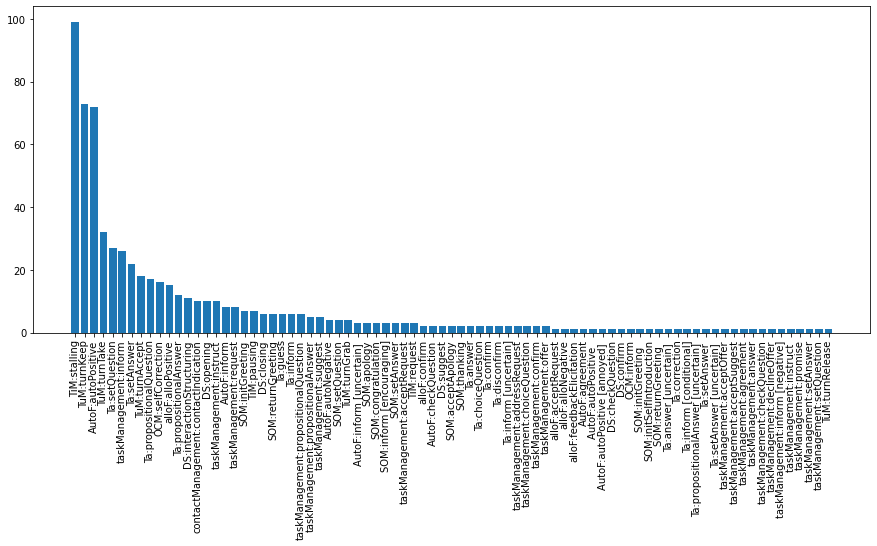

In [8]:
plt.figure(figsize=(15, 6))
plt.bar(dbox_tags['tag'], dbox_tags['count'])
plt.xticks(rotation=90)
plt.show()

## MapTask

https://groups.inf.ed.ac.uk/maptask/

Дилоги между двумя людьми, в ходе которых перед каждым участником была карта, невидимая для другого участника. У одного из участников на карте был построен маршрут. Цель диалогов - объяснить второму участнику, какой маршрут надо построить.  

В открытом доступе на сайте DialogBank только 3 размеченных по ISO диалога. Но в целом все диалоги MapTask (их 128) в другой разметке + транскрипты есть в открытом доступе, их можно доразметить самим


*HCRC Map Task Corpus was developed by the University of Edinburgh and contains a total of about 18 hours of spontaneous speech that was recorded from 128 two-person conversations, involving 64 different speakers (32 female, 32 male, all adults, each taking part in four conversations).* 

In [9]:
maptask = pd.read_excel('maptask.xlsx')
maptask.head(5)

,id,Markables,Da-ID,Dialogue acts,Sender,Addressee,other Ps,FS text,Turn transcription
0,1,fs1,da1,DS:opening,p1,p2,NaN,okay,okay now you're starting above the diamond min...
1,1,fs2,da2,Ta:instruct,p1,p2,NaN,now youre starting above the diamond mine,NaN
2,1,fs3,da3; da4,TuM:turnKeep; TiM:stalling,p1,p2,NaN,ehm,NaN
3,1,fs4,da5,AutoF:autoPositive (Fe:da2),p2,p1,NaN,mmhmm,mmhmm
4,1,fs5,da6,Ta:inform {elaboration da2},p1,p2,NaN,and the desert is below to your left,and the desert is below to your left er


In [10]:
maptask_tags = pd.read_excel('maptask_tags.xlsx')
maptask_tags.head(5)

,tag,count
0,Ta:instruct,140
1,AutoF:autoPositive,136
2,Ta:inform,53
3,Ta:acceptRequest,52
4,TiM:stalling,33


In [11]:
about_df(maptask)

Информация о датасете:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  450 non-null    int64  
 1   Markables           450 non-null    object 
 2   Da-ID               450 non-null    object 
 3   Dialogue acts       450 non-null    object 
 4   Sender              450 non-null    object 
 5   Addressee           450 non-null    object 
 6   other Ps            0 non-null      float64
 7   FS text             450 non-null    object 
 8   Turn transcription  189 non-null    object 
 9   Comments            0 non-null      float64
dtypes: float64(2), int64(1), object(7)
memory usage: 35.3+ KB

Количество диалогов, размеченных по стандарту ISO:  3

Средняя длина диалога:  220.66666666666666


Длина диалогов:

In [12]:
maptask.groupby('id')['FS text'].count()

id
1    178
2    151
3    333
Name: FS text, dtype: int64

**Распределение тегов:**

In [13]:
maptask_tags.head(15)

,tag,count
0,Ta:instruct,140
1,AutoF:autoPositive,136
2,Ta:inform,53
3,Ta:acceptRequest,52
4,TiM:stalling,33
5,Ta:answer,32
6,TuM:turnTake,27
7,Ta:propositionalQuestion,26
8,Ta:checkQuestion,24
9,TuM:turnKeep,20


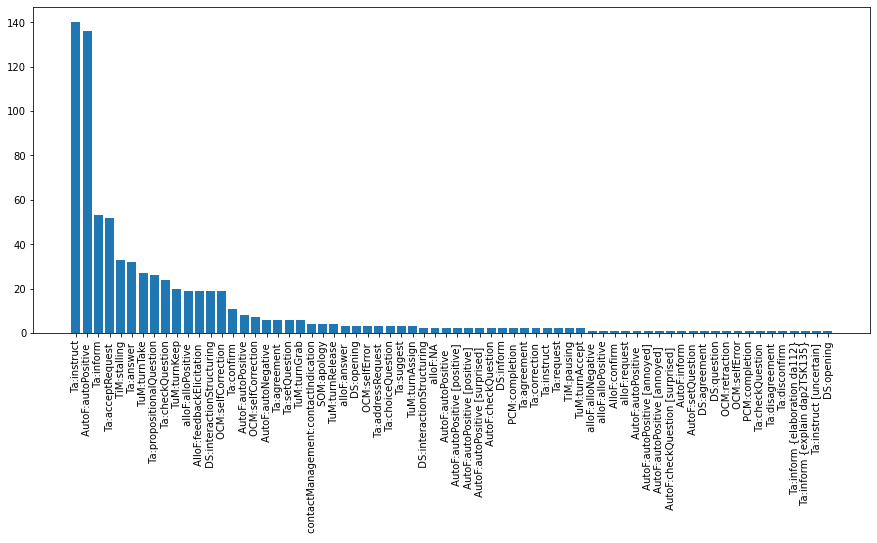

In [14]:
plt.figure(figsize=(15, 6))
plt.bar(maptask_tags['tag'], maptask_tags['count'])
plt.xticks(rotation=90)
plt.show()

## Switchboard

https://dialogbank.lsv.uni-saarland.de/?page_id=92

https://catalog.ldc.upenn.edu/LDC97S62

Записи телефонных разговоров между двумя собеседниками (тема разговора задавалась роботом-оператором, когда людей соединяли друг с другом). 

В открытом доступе есть 4 диалога из этого корпуса с разметкой ISO. Сам корпус есть в открытом доступе, его можно переразметить по ISO 

In [15]:
switch = pd.read_excel('switch.xlsx')
switch.head(5)

,id,Markables,Da-ID,Dialogue acts,Sender,Addressee,other Ps,FS text,Turn transcription,Comments
0,1,sw00-0004-fs1,da1,Ds:opening,A,B,NaN,Right,"Right, /",NaN
1,1,sw00-0004-fs2,da2; da3,TuM:turnKeep;TiM:stalling,A,B,NaN,uh,"{F uh, } {D actually } I lived over in Europe ...",NaN
2,1,sw00-0004-fs3,da4,Ta:inform,A,B,NaN,actually I lived over in Europe for a couple o...,NaN,NaN
3,1,sw00-0004-fs4,da5,Ta:inform,A,B,NaN,I lived in Germany,I lived in Germany /,NaN
4,1,sw00-0004-fs5,da6,Ta:inform,A,B,NaN,and in Germany they don't have the jury system,{C and } in Germany they don't have the jury s...,NaN


In [16]:
switch_tags = pd.read_excel('switch_tags.xlsx')
switch_tags.head(5)

,tag,count
0,Ta:inform,331
1,TiM:stalling,187
2,AutoF:autoPositive,143
3,TuM:turnKeep,66
4,OCM:selfCorrection,46


In [17]:
about_df(switch)

Информация о датасете:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  450 non-null    int64  
 1   Markables           450 non-null    object 
 2   Da-ID               450 non-null    object 
 3   Dialogue acts       450 non-null    object 
 4   Sender              450 non-null    object 
 5   Addressee           450 non-null    object 
 6   other Ps            0 non-null      float64
 7   FS text             450 non-null    object 
 8   Turn transcription  189 non-null    object 
 9   Comments            0 non-null      float64
dtypes: float64(2), int64(1), object(7)
memory usage: 35.3+ KB

Количество диалогов, размеченных по стандарту ISO:  4

Средняя длина диалога:  253.0


Длина диалогов:

In [18]:
switch.groupby('id')['FS text'].count()

id
1    170
2    202
3    379
4    261
Name: FS text, dtype: int64

**Распределение тегов:**

In [19]:
switch_tags.head(15)

,tag,count
0,Ta:inform,331
1,TiM:stalling,187
2,AutoF:autoPositive,143
3,TuM:turnKeep,66
4,OCM:selfCorrection,46
5,Ta:agreement,42
6,TuM:turnTake,29
7,Ta:answer,24
8,TuM:turnTake;TiM:stalling,16
9,OCM:retraction,15


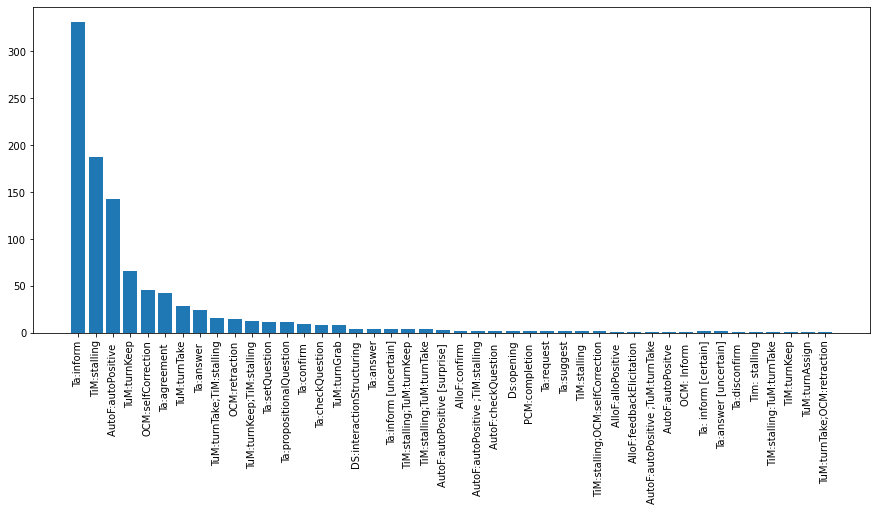

In [20]:
plt.figure(figsize=(15, 6))
plt.bar(switch_tags['tag'], switch_tags['count'])
plt.xticks(rotation=90)
plt.show()

## Hujiang

https://dialogbank.lsv.uni-saarland.de/?page_id=1387

Диалоги используются в качестве упражнений для китайцев, изучающих английский язык. Доступно 4 коротких диалога с разметкой ISO

In [21]:
hujiang = pd.read_excel('hujiang.xlsx')
hujiang.head(5)

,id,Markables,Da-ID,Dialogue acts,Sender,Addressee,other Ps,FS text,Turn transcription,Comments
0,1,lib-fs1,da1,DS:setQuestion,A,B,NaN,What can I do for you?,What can I do for you?,NaN
1,1,lib-fs2,da2,Ta:answer (Fu:da1),B,A,NaN,I was looking for a book but I couldn't find it,I was looking for a book but I couldn't find it,NaN
2,1,lib-fs3,da3,Ta:propositionalQuestion,A,B,NaN,Did you check the database to see if it was on...,Did you check the database to see of it was on...,NaN
3,1,lib-fs4,da4,Ta:answer (Fu:da3),B,A,NaN,I already did.,I already did.,NaN
4,1,lib-fs5,da5,Ta::propositionalQuestion,A,B,NaN,Is it on the shelf?,Is it on the shelf?,NaN


In [22]:
hujiang_tags = pd.read_excel('hujiang_tags.xlsx')
hujiang_tags.head(5)

,tag,count
0,Ta:inform,27
1,Ta:answer,16
2,Ta:propositionalQuestion,9
3,Ta:setQuestion,7
4,SOM:inform,6


In [23]:
about_df(hujiang)

Информация о датасете:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  450 non-null    int64  
 1   Markables           450 non-null    object 
 2   Da-ID               450 non-null    object 
 3   Dialogue acts       450 non-null    object 
 4   Sender              450 non-null    object 
 5   Addressee           450 non-null    object 
 6   other Ps            0 non-null      float64
 7   FS text             450 non-null    object 
 8   Turn transcription  189 non-null    object 
 9   Comments            0 non-null      float64
dtypes: float64(2), int64(1), object(7)
memory usage: 35.3+ KB

Количество диалогов, размеченных по стандарту ISO:  4

Средняя длина диалога:  26.25


Длина диалогов:

In [24]:
hujiang.groupby('id')['FS text'].count()

id
1    13
2    34
3    33
4    25
Name: FS text, dtype: int64

**Распределение тегов:**

In [25]:
hujiang_tags.head(15)

,tag,count
0,Ta:inform,27
1,Ta:answer,16
2,Ta:propositionalQuestion,9
3,Ta:setQuestion,7
4,SOM:inform,6
5,Ta:agreement,4
6,AutoF:autoPositive,3
7,Ta:answer,3
8,TuM:takeTurn,3
9,DS:interactionStructuring,2


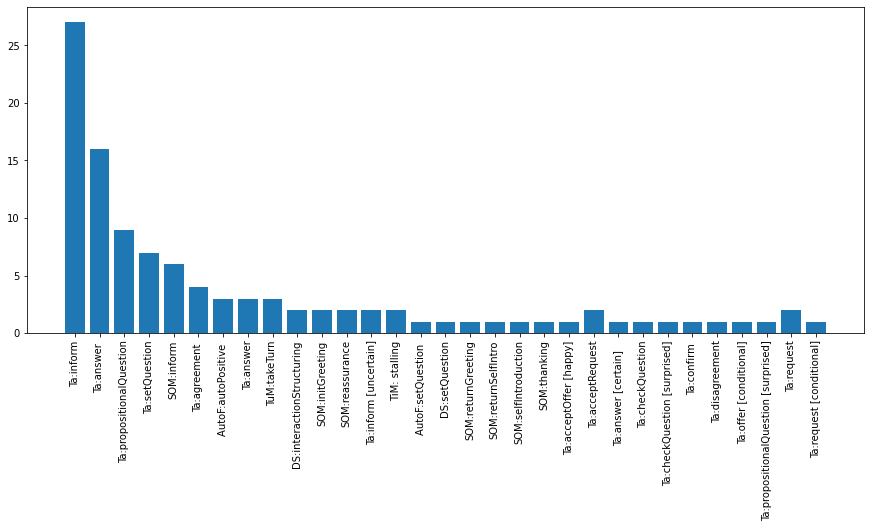

In [26]:
plt.figure(figsize=(15, 6))
plt.bar(hujiang_tags['tag'], hujiang_tags['count'])
plt.xticks(rotation=90)
plt.show()

## Trains

https://www.cs.rochester.edu/research/speech/trains.html

В диалогах участвуют два участника: один играет роль пользователя и выполняет определенную задачу, а другой играет роль системы, выступая в роли помощника по планированию/выполнению задачи. Пример задачи: доставка товаров по ж/д

Всего корпус содержит 98 диалогов, но только 2 размечены по ISO (причем подход к разметке во втором диалоге отличается от всех остальных, которые мы рассмотрели). Все транскрипты диалогов можно скачать с официальной страницы

In [27]:
trains_1 = pd.read_excel('trains_1.xlsx')
trains_1.head(5)

,id,Markables,Da-ID,Dialogue acts,Sender,Addressee,Other Ps,FS text,Turn transcription
0,1,TRAINS1-fs1,da1; da2,DS:opening; SOM:initialGreeting,S,U,NaN,hello,"hello, can I help you"
1,1,TRAINS1-fs2,da3,DS:offer,S,U,NaN,can I help you,NaN
2,1,TRAINS1-fs3,da4,DS:acceptOffer (Fu:da3),U,S,NaN,yeah,yeah I want t- I want to determine the maximum...
3,1,TRAINS1-fs4,da5,Ta:stalling,U,S,NaN,I want t-,NaN
4,1,TRAINS1-fs5,da6,Ta:inform,U,S,NaN,I want to determine the maximum number of boxc...,NaN


In [28]:
trains_1_tags = pd.read_excel('trains_1_tags.xlsx')
trains_1_tags.head(5)

,tag,count
0,Ta:inform,38
1,AutoF:autoPositive,32
2,TuM:turnKeep,30
3,TiM:stalling,25
4,TuM:turnTake,16


In [29]:
about_df(trains_1)

Информация о датасете:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  450 non-null    int64  
 1   Markables           450 non-null    object 
 2   Da-ID               450 non-null    object 
 3   Dialogue acts       450 non-null    object 
 4   Sender              450 non-null    object 
 5   Addressee           450 non-null    object 
 6   other Ps            0 non-null      float64
 7   FS text             450 non-null    object 
 8   Turn transcription  189 non-null    object 
 9   Comments            0 non-null      float64
dtypes: float64(2), int64(1), object(7)
memory usage: 35.3+ KB

Количество диалогов, размеченных по стандарту ISO:  2

Средняя длина диалога:  92.0


**Распределение тегов:**

In [30]:
trains_1_tags.head(15)

,tag,count
0,Ta:inform,38
1,AutoF:autoPositive,32
2,TuM:turnKeep,30
3,TiM:stalling,25
4,TuM:turnTake,16
5,Ta:answer,12
6,Ta:setQuestion,9
7,Ta:checkQuestion,6
8,TuM:turnAssign,5
9,OCM:selfCorrection,4


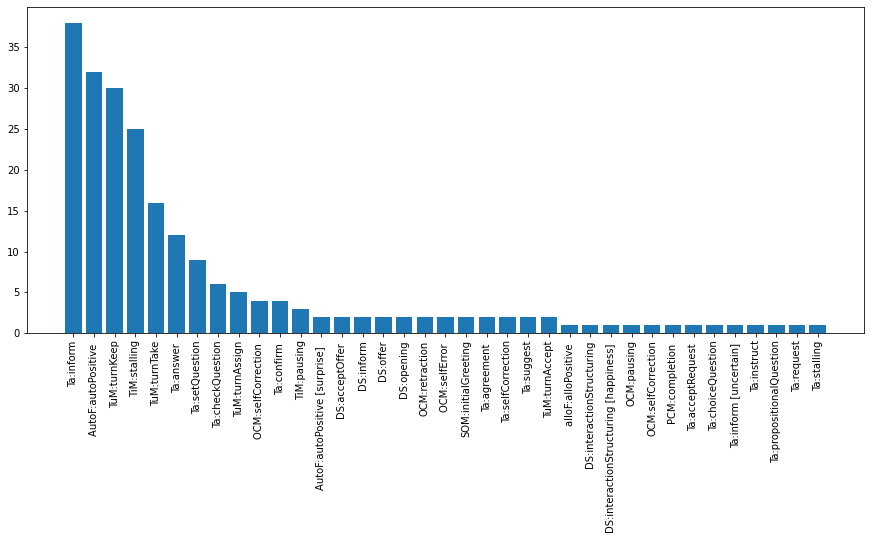

In [31]:
plt.figure(figsize=(15, 6))
plt.bar(trains_1_tags['tag'], trains_1_tags['count'])
plt.xticks(rotation=90)
plt.show()

Второй диалог Trains размечен немного иначе:

In [32]:
trains_2 = pd.read_excel('trains_2.xlsx')
trains_2.head(5)

,Markables,Sender,Addressee,other Ps,Turn transcription,FS text,Task,autoFeedback,alloFeedback,turnManagement,timeManagement,ownCommunicationManagement,partnerCommunicationManagement,discourseStructuring,socialObligationsManagement,Comments
0,TRAINS3-fs1,S,U,NaN,"hello, can I help you",hello,NaN,NaN,NaN,NaN,NaN,NaN,NaN,da1:opening,NaN,NaN
1,TRAINS3-fs2,S,U,NaN,NaN,can I help you,NaN,NaN,NaN,NaN,NaN,NaN,NaN,da2:offer,NaN,NaN
2,TRAINS3-fs3,U,S,NaN,"yes, I'd like to take a tanker from Corning an...",yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,da3:acceptOffer (Fu:da2),NaN,NaN
3,TRAINS3-fs4,U,S,NaN,NaN,I'd like to take a tanker from Corning and bri...,da4:inform,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TRAINS3-fs5,S,U,NaN,alright,alright,NaN,da5:autoPositive (Fe:da4),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
trains_2['FS text'].count()

41

## Summary

Данные с разметкой ISO можно представить в удобном для чтения формате (помимо того, который использовала я, на сайте представлены еще два других формата). Но проблема в том, что в открытом доступе нет большого датасета, который был бы размечен по ISO. В dialogbank лежат только частично размеченные и переразмеченные датасеты. Тем не менее, на гитхабе есть модели, которыми можно разметить диалоги по ISO.

**Датасеты:**

**Dbox:** в диалогах много пауз (тег stalling), вопросов и ответов (т.к. в этом суть игры). Из-за того, что диалоги ведутся между человеком и компьютером, они кажутся не очень естественными. Датасет очень специфический и вряд ли подойдет под наши задачи.

**Maptask:** диалоги тоже очень специфичны из-за задачи, которая в них решается (построение маршрута). Т.к. один собеседник должен объяснить второму маршрут, преобладает тег task:instruct (говорящий дает указания собседенику), который не встречается в других датасетах. Поэтому кажется, что Маптаск нам тоже не очень подходит

**Switchboard:** больше похож на то, что нам нужно. Люди обсуждают заданную тему и рассказывают друг другу что-то с ней связанное -> много тегов inform (передача информации). Присутствуют паузы, появляется тег self correction (человек сам себя исправляет). Вопросы и ответы на них есть, но их меньше.

**Hujiang:** этот датасет нам тоже не очень полезен. Диалогов в нем мало, и они очень короткие. Хотя по структуре они, в целом, похожи на диалоги switchboard: преобладают теги inform, answer, set question.

**Trains:** хотя это task-oriented диалоги (один человек выясняет у другого, как можно доставить что-то с помощью ж/д перевозок), распределение тегов в них тоже похоже на switchboard. Плюс эти диалоги есть в открытом доступе, хоть и без разметки ISO, поэтому можно попробовать их использовать